[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dbwilburn/BIOC5721/blob/main/Gas_Laws_in_Python_AU23.ipynb)

## **BIOC5721 - Physical Biochemistry I**
### **Simulation and Plotting of Statistical and Physical Principles**

***

DBW 2023-09-05

To make best use of this notebook, Edit > Clear all outputs, then run desired cells sequentially

This notebook builds on **[Intro_python_plotting_5721_AU23](https://github.com/mpfoster/Biochem5721/blob/master/Intro_python_plotting_5721_AU23.ipynb)** in providing an introduction to performing data analysis and visualization using the Python programming language. We will review some but not all key concepts covered in this first notebook, so please refer back to it if you have any questions



For example, this is a ***markdown cell*** where information can be written and formatted in various ways using different flags. They are useful for embedding different types of important textual data to accompany your source code.

Text can be **bolded**, _italicized_, and formatted to look like `code`, rendered as a $\frac{Latex}{equation}$, as well as other options.

Install the required packages; for docs for details

Numpy: https://numpy.org/doc/
<br>
Pandas: https://pandas.pydata.org/docs/
<br>
Scipy: https://docs.scipy.org/doc/scipy/
<br>
Matplotlib: https://matplotlib.org/stable/index.html
<br>

*If already installed, can comment out the next line, or just not run the cell*

In [5]:
!pip install numpy pandas scipy matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Next we will import the required libraries for data analysis. *A **Python Library** is a collection of source code that makes everyday tasks more efficient.* The four libraries that we are importing (`numpy`, `pandas`, `scipy`, and `matplotlib`) are the foundation of most modern Python informatics pipelines.

For the Python (iPython) interpretor that is connected to our Jupyter notebook to have access to the source code in the library, we need to `import` the library. Once the library is imported, we can access functions within the library by using `.` as a separator:


In [6]:
import numpy

numpy.mean([3,6])

4.5

For many commonly used libraries that will be called several times when writing a script, it is often useful to import libraries with **nicknames**. By using the  `import X as Y`  structure, we can give nicknames to libraries that can make things quicker to type.


Sometimes we may know we only want 1-2 functions out of a library, and also a means to minimize/simplify code later, we can selectively import those functions from libraries by using the structure  `from library.sub_library import function` 

In [7]:
## Numpy and Pandas for numerical operations and data frames, respectively
import numpy as np, pandas as pd

## Matplotlib for data visualization
import matplotlib.pyplot as plt

## Import curve fit and stats sublibrary from scipy
from scipy.optimize import curve_fit # Non-linear regression
import scipy.stats as stats # General statistics package


Let's define a few of our thermodynamic constants that we're likely to need


In [8]:
R = 8.314
A = 6.022e23
M_H2O = 18.0153

## Let's explore a situation we discussed in class:
### How much energy (***q***) is required to raise the temperature of **1 L** of water from **20** to **40°C** (shower temperature) at **constant pressure**?

## **$$q=\int_{T_1}^{T_2} C\,dT$$**

During class, we assumed that **C was constant with respect to T**, which allowed us to reduce the integral to...

## **$$q=C{\Delta}T$$**

Using the *approximate* average **$C_p$** of **75 J/mol/K** such that...
## **q ~ 75 J/mol/K  x  50 mol x 20 K = 75 kJ**
## or... **q = 1000 g x 1 cal/g/K x 20 K = 20 kcal**

Import the specific heat ($C_p$) of water as a function of temperature.

Temperature is reported in **Kelvin**, Saturation Pressure is in **bar**, and Specific Heat is in **J/g-K**


These values come from this [source](https://amesweb.info/Materials/Specific-Heat-Capacity-of-Water.aspx) which uses a second-order polynomial interpolation adapted from [this textbook](https://www.amazon.com/gp/offer-listing/0470501979/ref=as_li_tl?ie=UTF8&camp=1789&creative=9325&creativeASIN=0470501979&linkCode=am2&tag=ameswebinfo-20&linkId=780be7235903e89e4b3bb9c44587d903)

In [9]:
data_file = 'https://raw.githubusercontent.com/dbwilburn/BIOC5721/main/H2O_Cp_by_T.csv'

cp_by_t = pd.read_csv( data_file, sep=',' ) # csv can take any character-separated format, defined by "sep"

cp_by_t # Jupyter by default prints whatever is returned by the last line

,Temperature,Saturation Pressure,Specific Heat
0,273.15,0.00611,4.217
1,275.00,0.00697,4.211
2,280.00,0.00990,4.198
3,285.00,0.01387,4.189
4,290.00,0.01917,4.184
5,295.00,0.02617,4.181
6,300.00,0.03531,4.179
7,305.00,0.04712,4.178
8,310.00,0.06221,4.178
9,315.00,0.08132,4.179


#### Before we begin with producing plots of *C* vs *T*, just a little explanation of terminology with `matplotlib` that can be confusing...

**Figure:** the top-most layer of a plot (kind of like the "big picture")<br>
**Axis/Axes:** the subplot(s) within a figure<br>

For very quick and dirty checks, many `matplotlib` commands such as `scatter` and `plot` can be called directly from `plt`, but this is not recommended behavior and limits the degree of control over the graphics you generate. It is better to create a `Figure` to which `Axes` can be added. There are multiple ways within `matplotlib` to do this, but for most circumstances, the simplest option is to create your `Figure` and `Axes` (**one or more**) simultaneously by using the `plt.subplots` function<br>

*Reminder that Python indexing starts from 0, not 1*

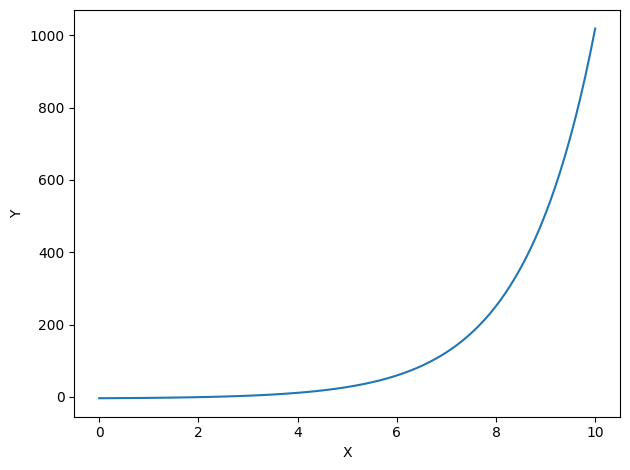

In [10]:
## Create a figure and axis simultaneously using subplots
fig, ax = plt.subplots()

## Generate some synthetic x/y data
x = np.linspace( 0, 10, 100 ) # Create 100 points between 0 and 10
y = 2**x-5 # y = 2^x - 5

## Plot the data on the axis and add labels to it
ax.plot( x, y )
ax.set_xlabel( 'X' )
ax.set_ylabel( 'Y' )

## Automatically adjust margins and boundaries in the figure between subpanels
fig.tight_layout()

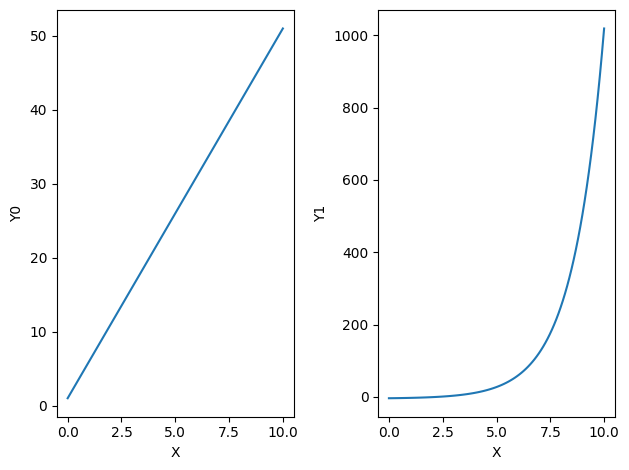

In [11]:
## This time create two subplots that are columns
fig, ax = plt.subplots(ncols=2) # ncols sets the # of columns

## Generate some synthetic x/y data
x = np.linspace( 0, 10, 100 ) # Create 100 points between 0 and 10
y0 = 5*x + 1 # y = 5x+1
y1 = 2**x-5 # y = 2^x - 5

## Plot the data on the axis and add labels to it
# When either ncols or nrows is used, ax is now a LIST where individual axes are indexed
ax[0].plot( x, y0 )
ax[0].set_xlabel( 'X' )
ax[0].set_ylabel( 'Y0' )

ax[1].plot( x, y1 )
ax[1].set_xlabel( 'X' )
ax[1].set_ylabel( 'Y1' )

## Automatically adjust margins and boundaries in the figure between subpanels
fig.tight_layout()

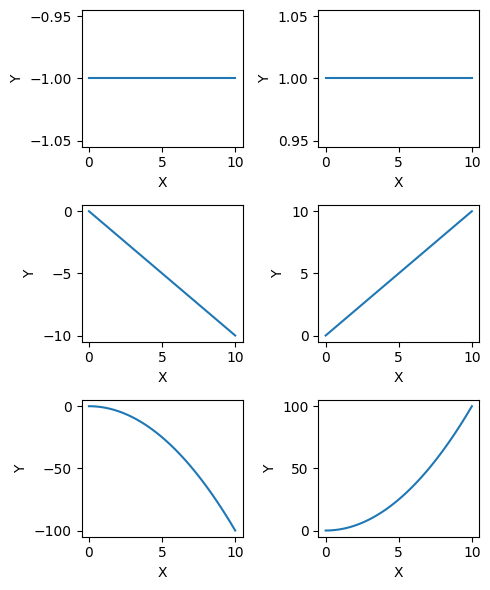

In [12]:
## If we expand to include nrows and ncols, ax uses [i,j] indexing
fig, ax = plt.subplots(figsize=(5,6), nrows=3, ncols=2) # Add figsize to set the dimensions of the figure

## Generate some synthetic x/y data
x = np.linspace( 0, 10, 100 ) # Create 100 points between 0 and 10

## Let's generate a unique dataset for each of the 6 plots based on their row #
for i in range(3): # row index [0,1,2]
    for j in range(2): # col index [0,1]
        s = 2*j-1 # Will now map 0->-1 and 1->1 for signs
        y = s * x**i # y = (-/+) x^i

        ax[i,j].plot(x,y)
        ax[i,j].set_xlabel('X')
        ax[i,j].set_ylabel('Y')



## Automatically adjust margins and boundaries in the figure between subpanels
fig.tight_layout()

## Let's return to *C* vs *T* and plot their relationship

**Reminder**: the `DataFrame` with our data is **cp_by_t**

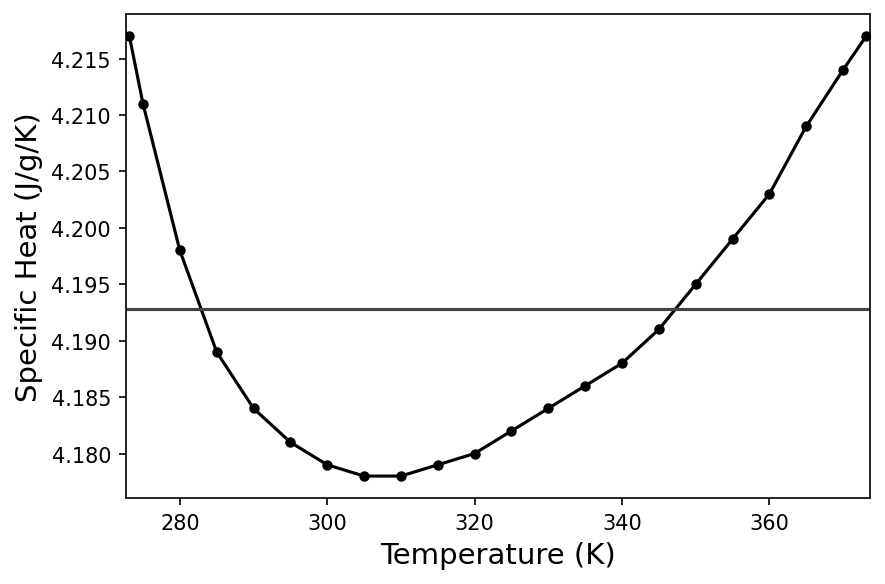

In [13]:
## Prepare our figure and axis
fig, ax = plt.subplots( figsize=(6,4), dpi=150 ) # figsize takes size in inches, and we can adjust pixels per inch using dpi

# Extract our variables and compute basic statistics
t = cp_by_t['Temperature']
cp = cp_by_t['Specific Heat']

cp_mean = np.mean( cp )

# Plot the data
ax.scatter( t, cp, color='black', s=16 )
ax.plot( t, cp, color='black' )
ax.plot( [0,500], [cp_mean]*2, color='#444444' ) # Hex-code for 3 shades of grey, #000000 = black, #FFFFFF = white

# Add labels
ax.set_xlabel( 'Temperature (K)', fontsize=14 )
ax.set_ylabel( 'Specific Heat (J/g/K)', fontsize=14 )

# Set bounds
xlim = ( t.min()-0.5, t.max()+0.5 )
ax.set( xlim=xlim )

fig.tight_layout()

#### How variable is the specific heat of water relative to the mean value?

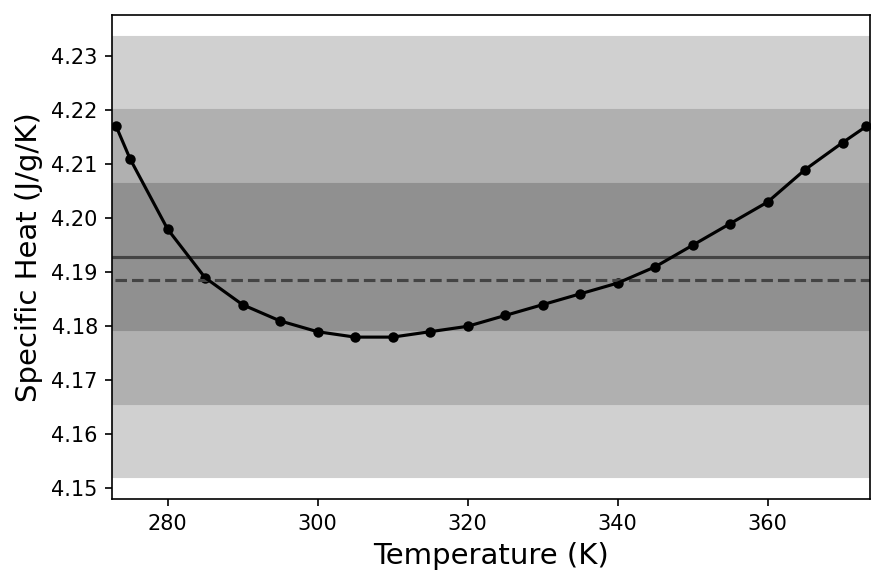

In [14]:
## Prepare our figure and axis
fig, ax = plt.subplots( figsize=(6,4), dpi=150 ) # figsize takes size in inches, and we can adjust pixels per inch using dpi

# Extract our variables and compute basic statistics
t = cp_by_t['Temperature']
cp = cp_by_t['Specific Heat']

# Compute mean and std, then add to plot as Z-bands
cp_mean = np.mean( cp )
cp_median = np.median( cp )
cp_std = np.std( cp, ddof=1 ) # Need to set ddof=1 to compute s instead of o

grey_shades = [ '#d0d0d0', '#b0b0b0', '#909090' ] # Hex-code for 3 shades of grey, #000000 = black, #FFFFFF = white
sd_plot_order = [ 3, 2, 1 ]
xz = [0,500]
for sd, g in zip(sd_plot_order,grey_shades):
    z_l = cp_mean-sd*cp_std
    z_u = cp_mean+sd*cp_std
    ax.fill_between( xz, [z_l]*2, [z_u]*2, color=g )
ax.plot( xz, [cp_mean]*2, color='#444444' ) # Mean is solid line
ax.plot( xz, [cp_median]*2, color='#444444', linestyle='dashed' ) # Median is dashed line

# Add original data
ax.scatter( t, cp, color='black', s=16 )
ax.plot( t, cp, color='black' )



# Add labels
ax.set_xlabel( 'Temperature (K)', fontsize=14 )
ax.set_ylabel( 'Specific Heat (J/g/K)', fontsize=14 )

# Set bounds
xlim = ( t.min()-0.5, t.max()+0.5 )
ax.set( xlim=xlim )

fig.tight_layout()

#### The tails are clearly asymmetric, but how non-Gaussian are the data? And where would our estimate of **75 J/mol/K** lie?

(4.192818181818183, 0.013261826158483985)


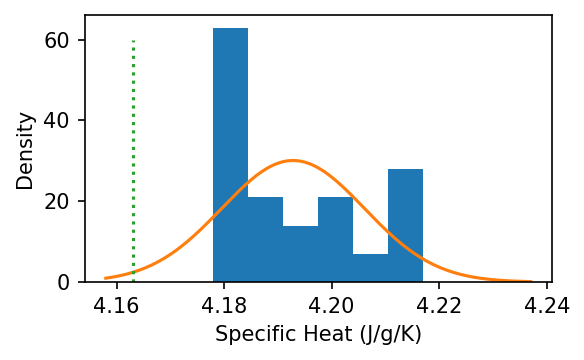

In [15]:
## Generate a histogram of the specific heats

fig, ax = plt.subplots( figsize=(4,2.5), dpi=150 )

cp = cp_by_t['Specific Heat']

ax.hist( cp, bins=6, density=True ) # Density = Compute as PDF, i.e. integral = 1

# Compute MLE of Normal/Gaussian distribution using Scipy Stats function
g_params = stats.norm.fit( cp )
print( g_params )

cp_lims = ( cp.min()-0.02, cp.max()+0.02 )
cp_pts = np.linspace( *cp_lims, 1000 ) # I "unpacked" cp_lims as two variables into linspace, i.e. the min and max values, now with 1000 pts
cp_fit_density = stats.norm.pdf( cp_pts, *g_params )
ax.plot( cp_pts, cp_fit_density )

# Add the 75 J/mol/K
cp_est_inG = 75.0 / M_H2O # Divide by molecular weight of water to convert to J/g/K
ax.plot( [cp_est_inG]*2, [0,60], linestyle='dotted' )

ax.set_xlabel( 'Specific Heat (J/g/K)')
ax.set_ylabel( 'Density' )

fig.tight_layout()


#### Looks like there are quite a few ways we could improve our estimate.
#### Let's return to our original definition of heat

## **$$q=\int_{T_1}^{T_2} C\,dT$$**

Computing the exact *analytical* integral across **T** would be quite hard, since we don't have a closed form solution of the relationship between specific heat, only the points in the **scatter plot** that we generated between **$C_p$** and **T**.

#### Could we use those **scatter plot** data to generate a better estimate of the heat required?

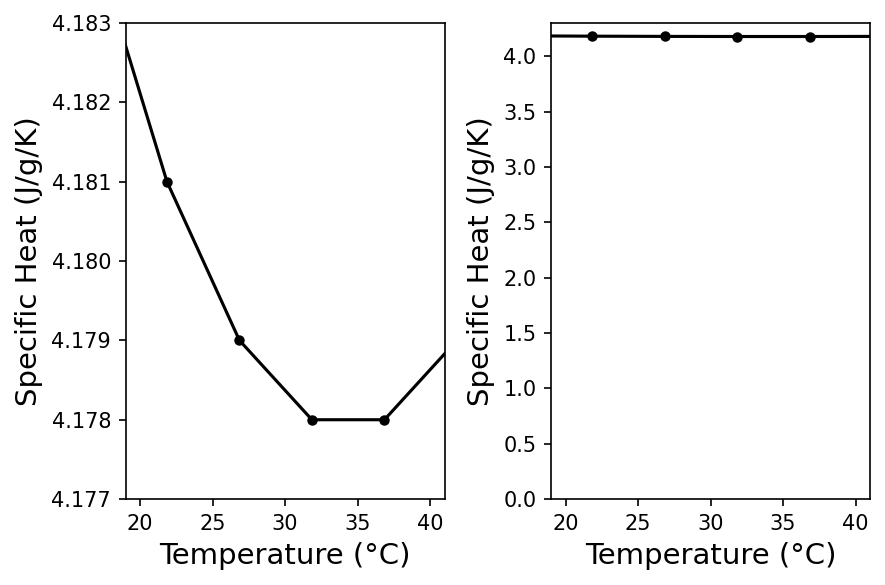

In [16]:
## Prepare our figure and axis
fig, ax = plt.subplots( figsize=(6,4), dpi=150, ncols=2 ) # figsize takes size in inches, and we can adjust pixels per inch using dpi

# Extract our variables and compute basic statistics
t = cp_by_t['Temperature'] - 273.15 ## CONVERTING TEMPERATURE TO °C
cp = cp_by_t['Specific Heat']

# Plot the data
for i in range(2):
    ax[i].scatter( t, cp, color='black', s=16 )
    ax[i].plot( t, cp, color='black' )

    # Add labels
    ax[i].set_xlabel( 'Temperature (°C)', fontsize=14 )
    ax[i].set_ylabel( 'Specific Heat (J/g/K)', fontsize=14 )

    # Set bounds
    ax[i].set_xlim( (19,41) ) # Setting to 19 and 41 °C since we're insterested in 20-40°C

ax[0].set_ylim( (4.177,4.183) ) # Optimized for viewing
ax[1].set_ylim( (0, 4.3) )

fig.tight_layout()

#### Given how narrow the range we're looking to integrate within is, we could probably make a much more reasonable approximation of **$C_p$ ~ 4.180**, but for the sake of exercise. Let's actually compute a very fine estimate of the integral.

#### **Reminder:** The *integral of a function **f** with respect to a variable* **x** can be graphically thought of as **the area under the curve** for the product of **f(x)** and **x**

#### Therefore, if we can estimate the **area under the curve** for **Specific Heat** with respect to **Temperature**, then we can more precisely estimate the change in heat of the system. To do this, we would like a **continuous estimator** of **C~T** using a finite sampling of data.

#### **Splines** are one such solution to this problem, which are *piecewise polynomial* functions where the pre-defined polynomial order dictates the level of curvature applied between points. *A first order spline function is identical to our current "connect-the-dot" presentation*

In [17]:
## Import a Scipy function for fitting 1d spline curves
from scipy.interpolate import interp1d

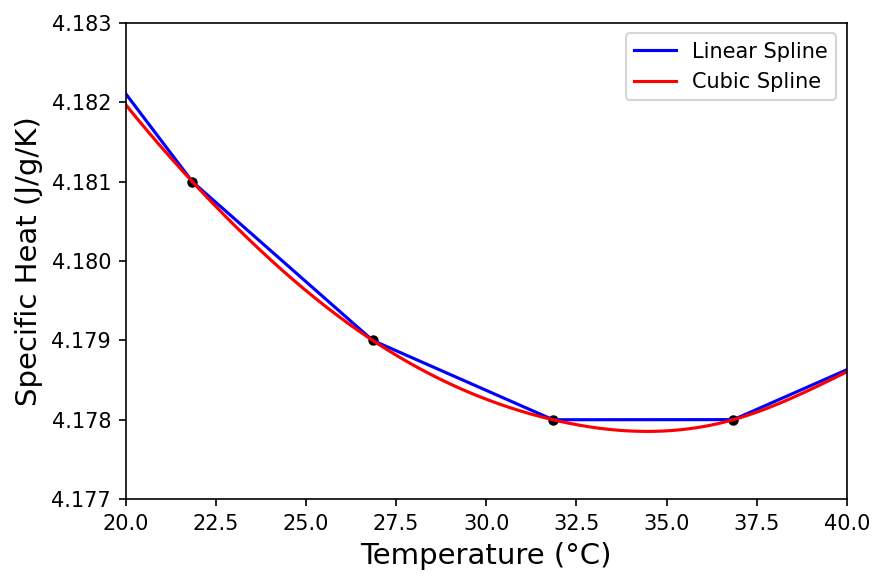

In [18]:
## Prepare our figure and axis
fig, ax = plt.subplots( figsize=(6,4), dpi=150 ) # figsize takes size in inches, and we can adjust pixels per inch using dpi

# Extract our variables and compute basic statistics
t = cp_by_t['Temperature'] - 273.15 ## CONVERTING TEMPERATURE TO °C
cp = cp_by_t['Specific Heat']

# Plot the data
ax.scatter( t, cp, color='black', s=16 )

## Define smooth interpolation range between 20 and 40
xt = np.linspace( 20, 40, 1000 )

## Compute linear spline, i.e. first-order. Color as BLUE
linear_spline = interp1d( t, cp, 'linear' )
yt = linear_spline( xt )
linear_line = ax.plot( xt, yt, color='blue', label='Linear Spline' ) # Add label + save as variable for legend

## Compute cubic spline, i.e. third-order. Color as RED
cubic_spline = interp1d( t, cp, 'cubic' )
yt = cubic_spline( xt )
cubic_line = ax.plot( xt, yt, color='red', label='Cubic Spline' ) # Add label + save as variable for legend

ax.legend()

# Add labels
ax.set_xlabel( 'Temperature (°C)', fontsize=14 )
ax.set_ylabel( 'Specific Heat (J/g/K)', fontsize=14 )

# Set bounds
ax.set( xlim=(20,40), ylim=(4.177,4.183) ) # Optimized bounds

fig.tight_layout()

#### So, at this point, we actually already have everything we need to compute the area under the curve for either the linear or cubic spline fit from 20 to 40°C. A common approximation of integrals are **Riemann sums** where we assume that the area under the curve can be approximated by the sum rectangles drawn under the curve. This approximation is highly intuitive as the integral is equivalent to the width of the rectangles **dx → 0**

#### And we've already approximated the values of 20-40°C with fine resolution: using `np.linspace` to construct `xt = np.linspace( 20, 40, 1000 )`. At this depth, the spacing between our points should be *(40-20)/(1000-1)=20/999~0.02. We can get smaller than that with little computational cost!

In [19]:
## Let's pre-define a step size of dx = 1e-4
dx = 1e-0
xt = np.arange( 20, 40, dx ) # Use arange to define range with dx instead of N
yt = cubic_spline( xt )

## The area of a rectangle is w x h, so the area of each of our small rectangles is yt * dx
## and the total area under the curve is the sum of yt * dx
area = np.sum(yt*dx)
area

83.58025879885845

#### Great, so this value is **higher** than the 75 J/g that we had estimated above, which makes sense given that our estimate of the specific heat of water was low (*green line relative to distribution*).

#### As a sanity check, let's draw the individual many little rectangles

In [20]:
from matplotlib.patches import Rectangle

`Rectangle` takes parameters `(x,y)` for the lower left coordinates, followed by the `width` and `height`

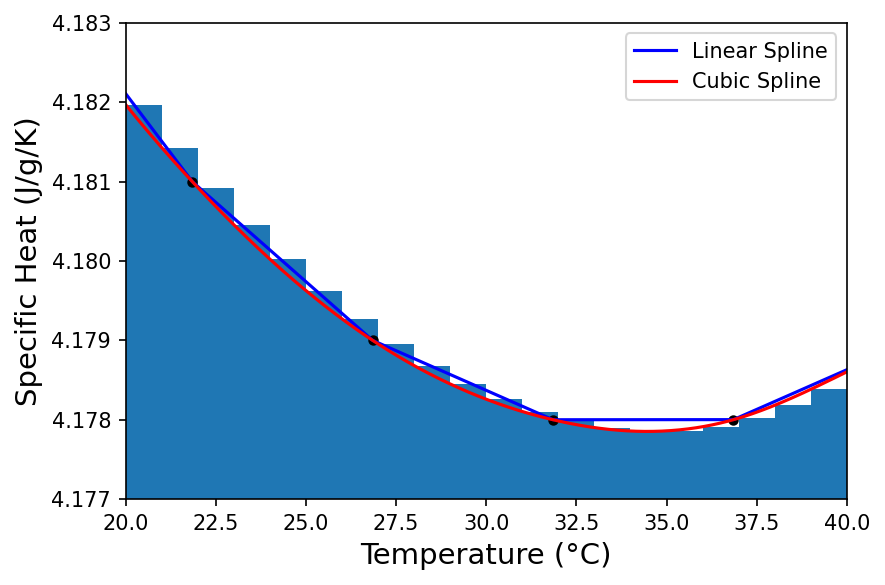

In [21]:
## Prepare our figure and axis
fig, ax = plt.subplots( figsize=(6,4), dpi=150 ) # figsize takes size in inches, and we can adjust pixels per inch using dpi

# Extract our variables and compute basic statistics
t = cp_by_t['Temperature'] - 273.15 ## CONVERTING TEMPERATURE TO °C
cp = cp_by_t['Specific Heat']


## FOR INITIAL SPEED REASONS, LET'S RECOMPUTE WITH DX=1.0
dx = 1e-0
xt = np.arange( 20, 40, dx ) # Use arange to define range with dx instead of N
yt = cubic_spline( xt )

for x,y in zip(xt,yt): # Loop over each element pair in xt and yt
    rect = Rectangle( (x,0), dx, y )
    ax.add_patch( rect )

# Plot the data
ax.scatter( t, cp, color='black', s=16 )

## Define smooth interpolation range between 20 and 40
xt = np.linspace( 20, 40, 1000 )

## Compute linear spline, i.e. first-order. Color as BLUE
linear_spline = interp1d( t, cp, 'linear' )
yt = linear_spline( xt )
linear_line = ax.plot( xt, yt, color='blue', label='Linear Spline' ) # Add label + save as variable for legend

## Compute cubic spline, i.e. third-order. Color as RED
cubic_spline = interp1d( t, cp, 'cubic' )
yt = cubic_spline( xt )
cubic_line = ax.plot( xt, yt, color='red', label='Cubic Spline' ) # Add label + save as variable for legend

ax.legend()

# Add labels
ax.set_xlabel( 'Temperature (°C)', fontsize=14 )
ax.set_ylabel( 'Specific Heat (J/g/K)', fontsize=14 )

# Set bounds
ax.set( xlim=(20,40), ylim=(4.177,4.183) ) # Optimized bounds

fig.tight_layout()

### Let's shift to a different example: **isothermal expansion of an ideal gas**

#### *Compute the work done on the **20-fold** isothermal expansion of **1.0 mol** of an ideal gas from ***STP****

#### If *isothermal*, we're assuming that the change in the pressure of the gas is happening *so slowly* In class, the equation was already solved that $${w_T}=\int_{V_1}^{V_2} -p\,dV=-nRT\ln\frac{V_2}{V_1}$$

#### So it's pretty trivial to solve that $${w_T}=-(1.0 mol)(8.314 J/mol/K)(273.15)\ln20\approx-6803.22~J$$

#### Could we get there through estimation?

In [34]:
8.314*273.15*np.log(20)

6803.21542511386

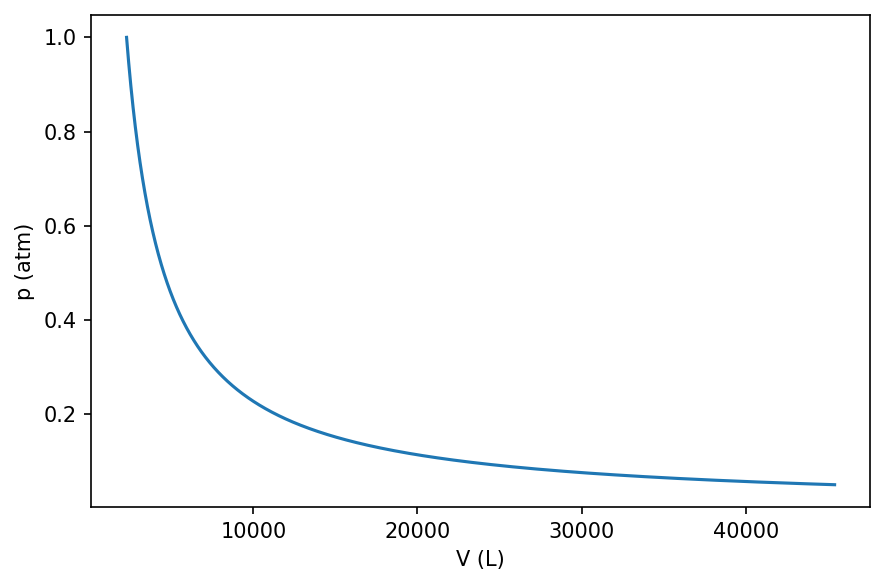

In [45]:
## The energy of the system = nRT

w = R*273.15 # R*T in K, since 1.0 mol

## PV = nRT = w implies the product of P and V = work
## Compute range of PV

## If the volume is EXPANDING 20-fold, then we know that the pressure is SHRINKING 20-fold

p = np.linspace( 1.0, 1/20.0, 1000 ) # 1000 points defining 20-fold shrinking of the pressure from 1.0 atm
v = w / p # w = pv

# Plot the relationship
fig, ax = plt.subplots( figsize=(6,4), dpi=150 )

ax.plot( v, p )

ax.set_xlabel( 'V (L)')
ax.set_ylabel( 'p (atm)' )

fig.tight_layout()

The work done is the integration of $${w_T}=\int_{V_1}^{V_2} p\,dV$$ which we can compute if we sum the **area under the curve** for **pressure with respect to volume** 

Energy Estimate: 6823.80


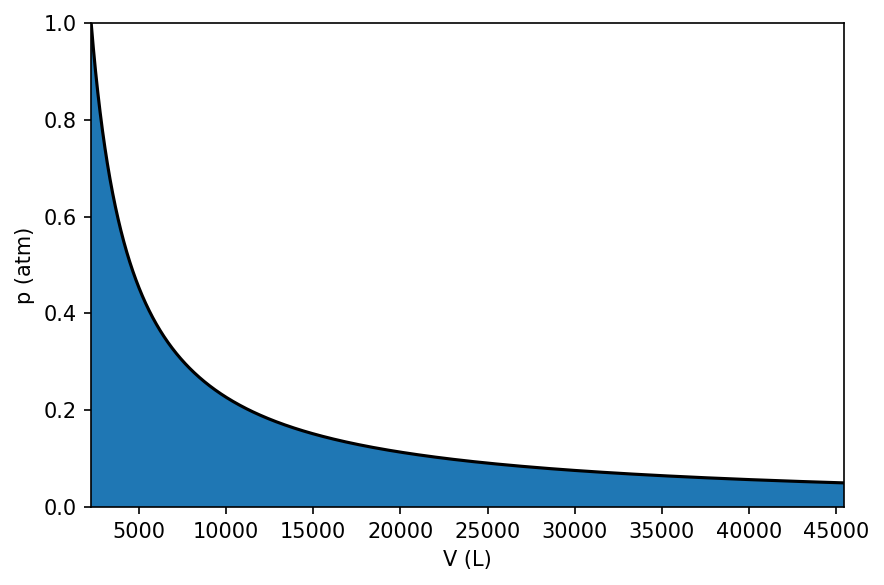

In [48]:
## Since we computed our linear steps along the y-axis p, for the Riemann sums, we need to compute our step sizes for V

dV = v[1:]-v[:-1]


fig, ax = plt.subplots( figsize=(6,4), dpi=150 )

ps = p[:-1]
#ps = (p[:-1]+p[1:])/2

for v_l, v_w, p_h in zip( v[:-1], dV, ps ):
    rect = Rectangle( (v_l,0), v_w, p_h )
    ax.add_patch( rect )
ax.plot( v, p, c='black' )

ax.set_xlabel( 'V (L)')
ax.set_ylabel( 'p (atm)' )

ax.set( xlim=(v.min(),v.max()), ylim=(0,1) )

fig.tight_layout()

## Print estimate
print( 'Energy Estimate: ' + format(np.sum( ps * dV ), '.2f' ) )

### Close, but not exact...

#### A small-but-important distinction we made in dividing our **p vs L** space is that steps are **linear** in **p** space, but **non-linear** in V space. *How can we balance the quantities to get a more exact estimate of the area under the curve?*

## **Log space to the rescue!**

### Since $w=pV$ through the properties of logarithms $\ln{w_T}=\ln{p}+\ln{V}$

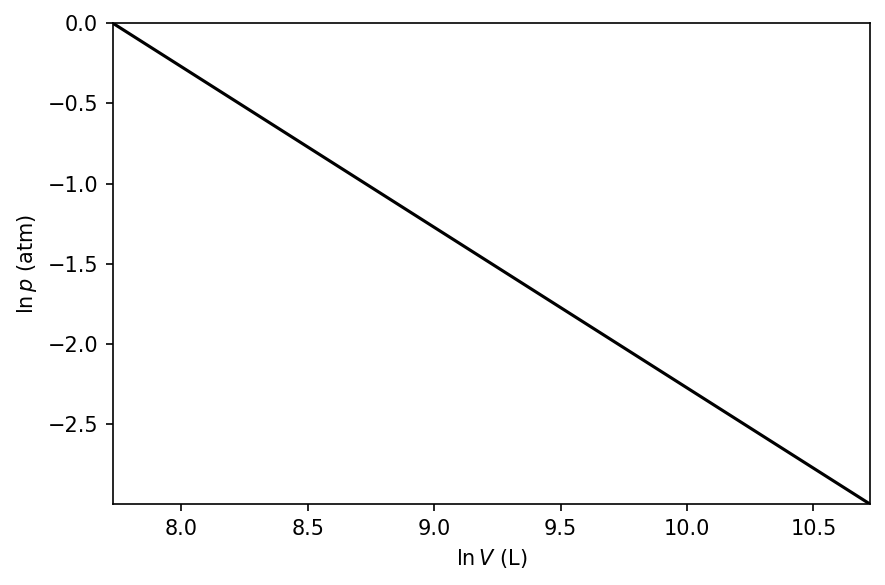

In [38]:
## Re-plot the data in this new scale

ln_w = np.log( w )

ln_p_0 = np.log( 1.0 )
ln_p_t = np.log( 1.0/20.0 )

ln_p = np.linspace( ln_p_0, ln_p_t, 1000 )
ln_V = ln_w - ln_p

fig, ax = plt.subplots( figsize=(6,4), dpi=150 )
ax.plot( ln_V, ln_p, c='black' )

ax.set_xlabel( '$\ln{V}$ (L)')
ax.set_ylabel( '$\ln{p}$ (atm)' )

ax.set( xlim=(ln_V.min(),ln_V.max()), ylim=(ln_p.min(),ln_p.max()) )

fig.tight_layout()


Compute area under the curve using the new log based space. Take advantage of the logarithm identity $e^{\ln{x}}=x$

In [40]:
## Compute the mean using the new log based steps

V = np.exp( ln_V )
dV = V[1:] - V[:-1]

p = np.exp( ln_p )

print( 'Energy Estimate: ' + format(np.sum( p[:-1] * dV ), '.2f' ) )

Energy Estimate: 6813.43


## Closer, but still not exact...

### Couple of tricks for improving further: (1) "center" the rectangles instead of using the left edge, and (2) add more points

In [42]:
## Center the points by finding the mean height between the points

ln_w = np.log( w )

ln_p_0 = np.log( 1.0 )
ln_p_t = np.log( 1.0/20.0 )

ln_p = np.linspace( ln_p_0, ln_p_t, 1000 )
ln_V = ln_w - ln_p

V = np.exp( ln_V )
dV = V[1:] - V[:-1]

p = np.exp( ln_p )
mean_p = (p[:-1] + p[1:])/2

print( 'Energy Estimate: ' + format(np.sum( mean_p * dV ), '.2f' ) )


Energy Estimate: 6803.23


Muuuuch closer...

In [43]:
## Add more points

ln_w = np.log( w )

ln_p_0 = np.log( 1.0 )
ln_p_t = np.log( 1.0/20.0 )

ln_p = np.linspace( ln_p_0, ln_p_t, 5000 )
ln_V = ln_w - ln_p

V = np.exp( ln_V )
dV = V[1:] - V[:-1]

p = np.exp( ln_p )
mean_p = (p[:-1] + p[1:])/2

print( 'Energy Estimate: ' + format(np.sum( mean_p * dV ), '.2f' ) )


Energy Estimate: 6803.22


And now exact!